# Izhikevich Neuron Model

A simple yet powerful spiking neuron model that reproduces various firing patterns observed in biological neurons.

## Equations

$$\frac{dv}{dt} = 0.04v^2 + 5v + 140 - u + I_{stim}$$

$$\frac{du}{dt} = a(bv - u)$$

**Reset conditions:** when $v = 30mV$:
- $v \leftarrow c$
- $u \leftarrow u + d$

Where:
- $v$ = membrane voltage
- $u$ = slow recovery variable
- $I_{stim}$ = external stimulation current
- $a, b, c, d$ = parameters that determine firing behavior

## Firing Modes

| Mode | Description |
|------|-------------|
| RS | Regular Spiking |
| IB | Intrinsically Bursting |
| CH | Chattering |
| FS | Fast Spiking |

## Tasks

1. Plot $v$ vs $t$ and $u$ vs $t$ for all four modes with step input current (0 → 20), $t \geq 100ms$
2. For RS mode, plot spike frequency vs $I_{stim}$ for current range 0–50 and find minimum spike frequency

## Reference

[Simple Model of Spiking Neurons (izhikevich.org)](https://www.izhikevich.org/publications/spikes.htm)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as wg
plt.rcParams["figure.figsize"]=(12,5)


def izhikevich(a,b,c,d,plotting='1',Io=20):
    """
    Simulate Izhikevich neuron model
    
    Parameters:
    -----------
    a, b, c, d : float
        Izhikevich model parameters
    Io : float
        Input current amplitude (pA)
    plotting : bool
        Whether to plot results
    
    Returns:
    --------
    v_t : list
        Membrane voltage trace
    u_t : list
        Recovery variable trace
    num_spikes : int
        Number of spikes
    spike_times : list
        Times of spikes
    """

    start=100 #ms before input current
    duration = start+ 1000 #ms
    I = np.concatenate([np.zeros(start),Io * np.ones(duration-start)])

    #initial membrane voltage and recovery variable
    v = -65
    u = b * v
    num_spikes=0

    v_t=[]
    u_t=[]

    for t in range(0, duration): 
        v_t.append(v)
        u_t.append(u)

      # When voltage goes above 30 mV, we find the spike time
      # then reset the membrane potnetial and membrane recovery variable

        if v>30:
            num_spikes+=1
            v=c
            u+=d

        #two time steps for computational efficiency
        v += 0.5 * (0.04 * v**2 + 5 * v + 140 - u + I[t])
        v += 0.5 * (0.04 * v**2 + 5 * v + 140 - u + I[t])
        u = u + a * (b * v - u)

    if plotting == '1':
        fig, axes = plt.subplots(1, 2)
        axes = axes.flatten()
        axes[0].plot(v_t)
        axes[0].set_xlabel('time(ms)')
        axes[0].set_ylabel('V(mv)')
        axes[0].set_title("Membrane Voltage over time")

        axes[1].plot(u_t)
        axes[1].set_xlabel('time(ms)')
        axes[1].set_xlabel('u')
        axes[1].set_title("Membrane recovery variable over time")

        plt.tight_layout()
        plt.show()

    else:
        return(v_t,u_t,num_spikes)

### TASK 1

--- Regular Spiking (RS) ---


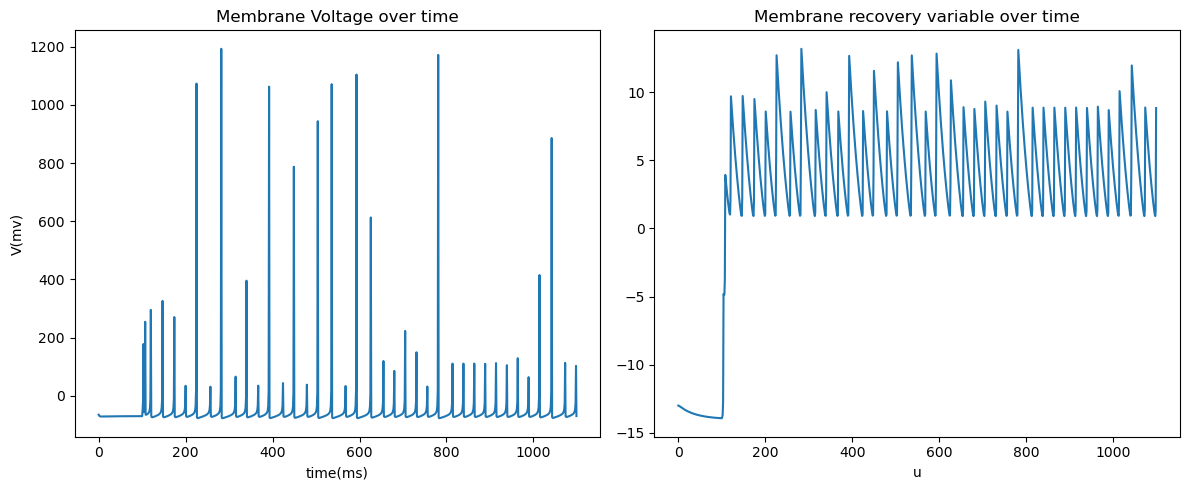

--- Intrinsically Bursting (IB) ---


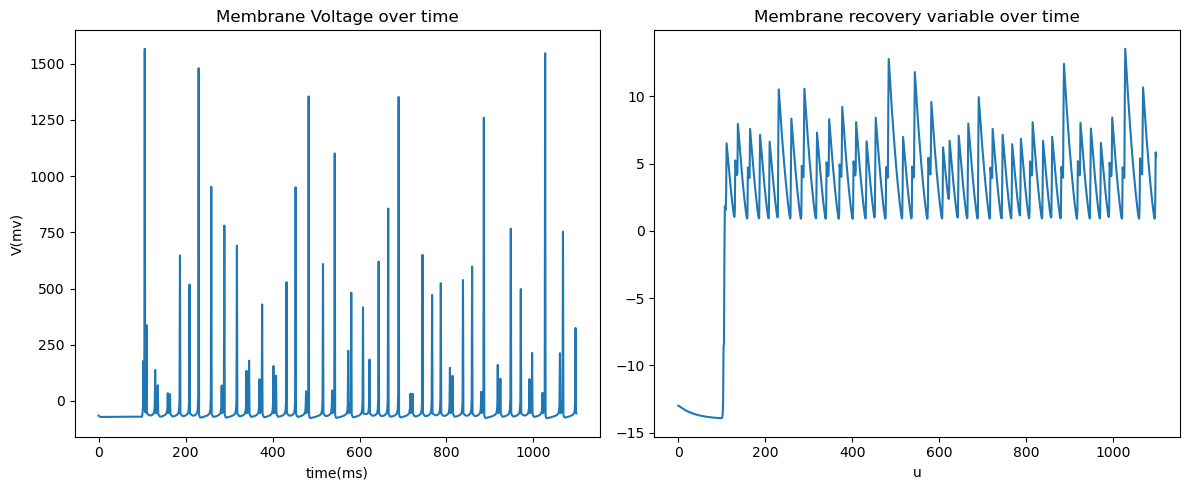

--- Chattering (CH) ---


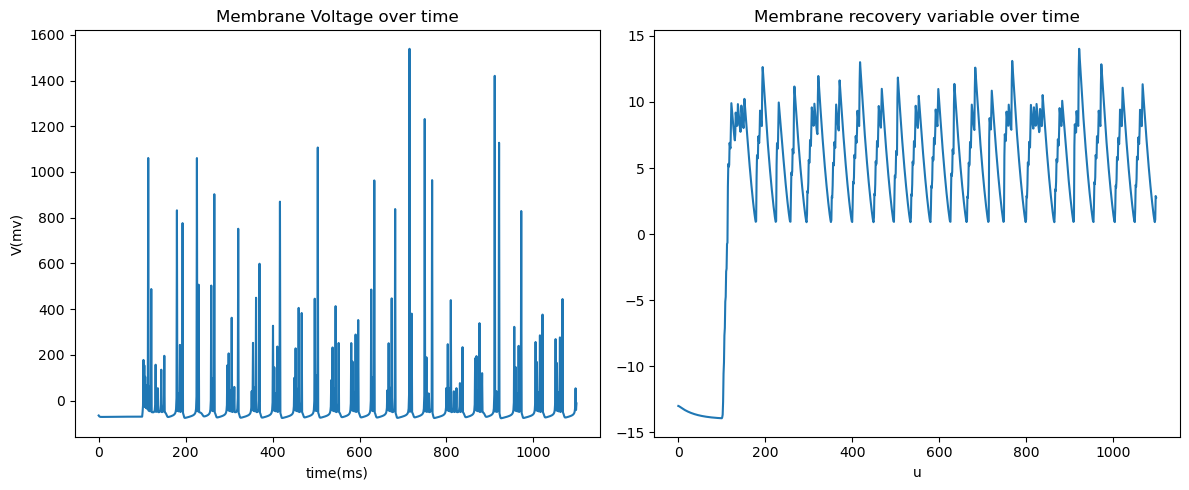

--- Fast Spiking (FS) ---


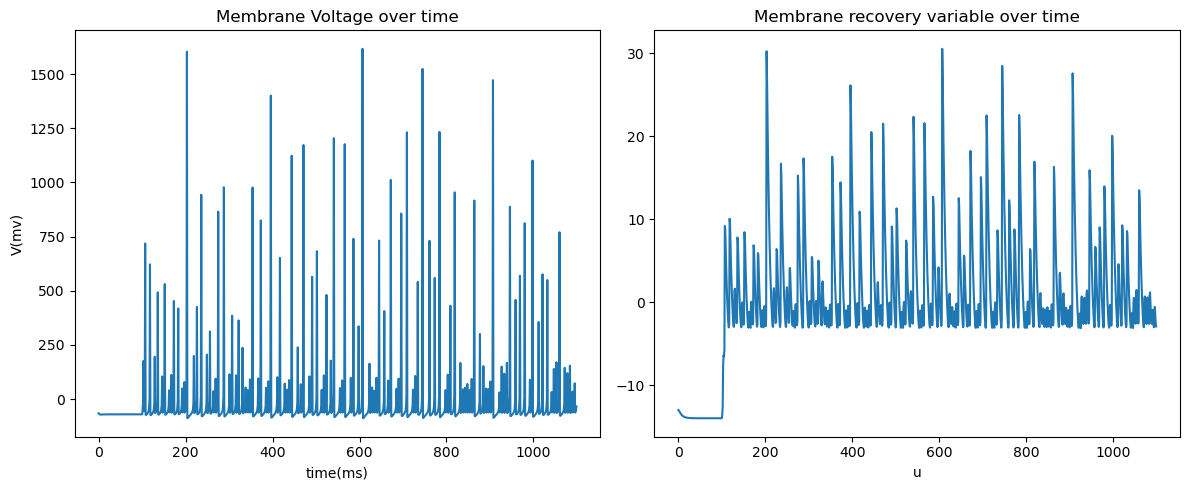

In [2]:
modes = {
    'Regular Spiking (RS)': [0.02, 0.2, -65, 8],
    'Intrinsically Bursting (IB)': [0.02, 0.2, -55, 4],
    'Chattering (CH)': [0.02, 0.2, -50, 2],
    'Fast Spiking (FS)': [0.1, 0.2, -65, 2]
}

for name, params in modes.items():
    a, b, c, d = params
    print(f"--- {name} ---")
    izhikevich(a, b, c, d)

#### Interactive parameter effects on membrane voltage and membrane recovery

In [3]:
a_slide=wg.FloatSlider(value=0.02,min=0,max=0.15,step=0.01)   
b_slide=wg.FloatSlider(value=0.2,min=0,max=0.3,step=0.01)   
c_slide=wg.IntSlider(value=-65,min=-70,max=-45,step=1)   
d_slide=wg.IntSlider(value=4,min=0,max=10,step=1)   
wg.interact(izhikevich, a=a_slide,b=b_slide,c=c_slide,d=d_slide)  

interactive(children=(FloatSlider(value=0.02, description='a', max=0.15, step=0.01), FloatSlider(value=0.2, de…

<function __main__.izhikevich(a, b, c, d, plotting='1', Io=20)>

#### TASK 2

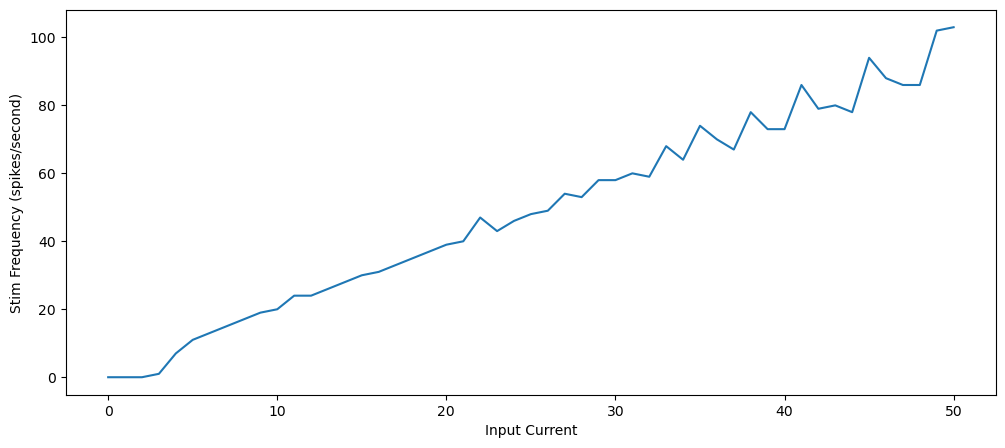

In [4]:
I_stim = list(range(0,51))

a,b,c,d=modes['Regular Spiking (RS)']
stim_freqs=[]
for Io in I_stim:
    
    [v,t,s]=izhikevich(a,b,c,d,'0',Io)
    
    stim_freqs.append(s)
    
plt.plot(I_stim,stim_freqs)
plt.xlabel("Input Current")
plt.ylabel("Stim Frequency (spikes/second)")
plt.show()

In [5]:
print("The minimum spike frequency is "+str(min(stim_freqs))+" spikes/second.")

The minimum spike frequency is 0 spikes/second.
